# Bello Responses

i. As Bello defines it, attack is the duration of a sound over which the amplitude is increasing. In contrast, the onset is a single moment that is chosen to mark the "beginning" of a sound. This is often at the beginning of what our ears could perceive as an event, so it will not always coincide evenly to a specific moment of an attack of a signal.

ii. Preprocessing is typically applied to a signal to make the data more relevant to what is being studied. For this reason there are a variety of preprocessing algorithms depending on the objectives of the research. For instance, preprocessing will often separate a signal into frequency bands, or divide a signal into transients and steady-states. For each of these processes there are multiple algorithms that will approach the task with different mechanics and strategies.

iii. Reduction is the most critical process in onset detection, involving a function to process audio into a collection of events. These functions can be designed to listen for sudden changes in loudness, or will sometimes work probabilistically. 

iv. Peak picking, the step after reduction in analyzing a signal, will let us distinguish signal from noise in identifying onset events. After post-processing of the signal, this is often as simple as findig the cutoff over which to pass signal-events through, keeping the noisey portion of the signal out of the final analysis.

# Assignment 3

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import aubio
from time import time

In [65]:
#f0 extraction function
def getYinVals(filename, samplerate, downsample, estimationmethod, tolerance):
    downsample = downsample
    samplerate = samplerate
    win_s = 1764 // downsample # fft size
    hop_s = 441 // downsample # hop size
    s = aubio.source(filename, samplerate, hop_s)
    samplerate = s.samplerate
    tolerance = 0.1

    pitch_o = aubio.pitch(estimationmethod, win_s, hop_s, samplerate) 
    pitch_o.set_tolerance(tolerance)

    pitchesYIN = []
    confidences = [] 
    total_frames = 0
    while True:
        samples, read = s()
        pitch = pitch_o(samples)[0]
        pitch = int(round(pitch))
        confidence = pitch_o.get_confidence()
        pitchesYIN += [pitch]
        confidences += [confidence]
        total_frames += read
        if read < hop_s:
            break     
            
    return pitchesYIN

In [67]:
#subplot function
def subPlot(dimH, dimL, sub, vector, title, ylabel, xlabel, ylimitlower, ylimitupper):
    plt.subplot(dimH, dimL, sub)
    plt.plot(np.asarray(vector), label='YIN', color='green') #??????
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.ylim(ylimitlower,ylimitupper)

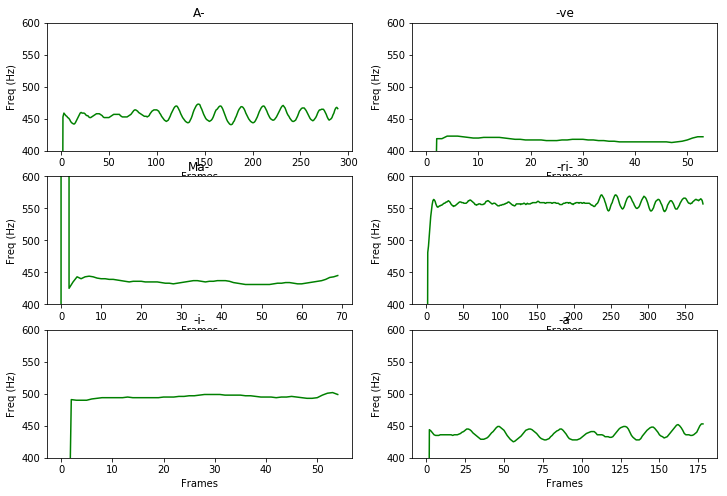

In [68]:
#Plotting
plt.figure(figsize=(12,8))

avm = ['avmA.wav', 'avmVe.wav', 'avmMa.wav', 'avmRi1.wav', 'avmI.wav', 'avmA2.wav']
titles = ['A-', '-ve', 'Ma-', '-ri-', '-i-', '-a']

for i in range(0, 6):
    subPlot(3, 2, i+1, getYinVals(avm[i], 44100, 1, 'yin', .1), titles[i], 'Freq (Hz)', 'Frames', 400, 600)
